In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [5]:
df = pd.read_csv("titanic.csv")

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [10]:
df.shape

(887, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [12]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [13]:
survived_counts = df['Survived'].value_counts()
survived_counts

0    545
1    342
Name: Survived, dtype: int64

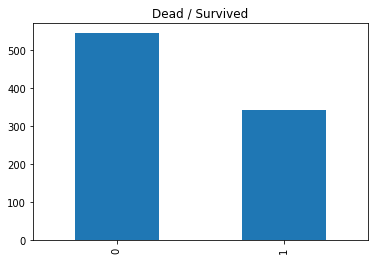

In [14]:
survived_counts.plot.bar(title='Dead / Survived');

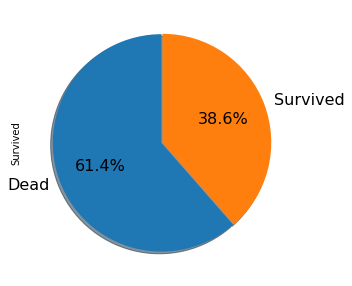

In [17]:
survived_counts.plot.pie(
    figsize=(5, 5),
    explode=[0, 0.01],
    labels=['Dead', 'Survived'],
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    fontsize=16);

In [26]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
882    27.0
883    19.0
884     7.0
885    26.0
886    32.0
Name: Age, Length: 887, dtype: float64

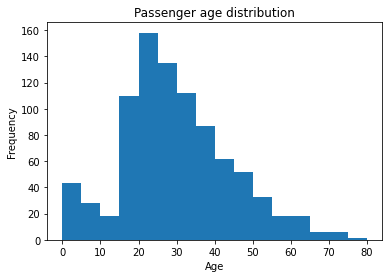

In [27]:
df['Age'].plot.hist(
    bins=16,
    range=(0, 80),
    title='Passenger age distribution')
plt.xlabel("Age");

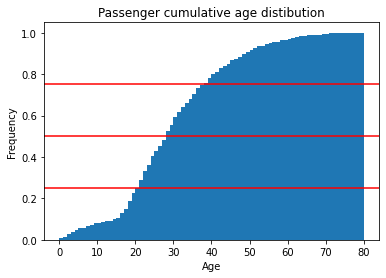

In [28]:
df['Age'].plot.hist(
    bins=80,
    range=(0, 80),
    title='Passenger cumulative age distibution',
    cumulative=True,
    density=True)
plt.xlabel("Age")
plt.axhline(0.25, color='red')
plt.axhline(0.5, color='red')
plt.axhline(0.75, color='red');

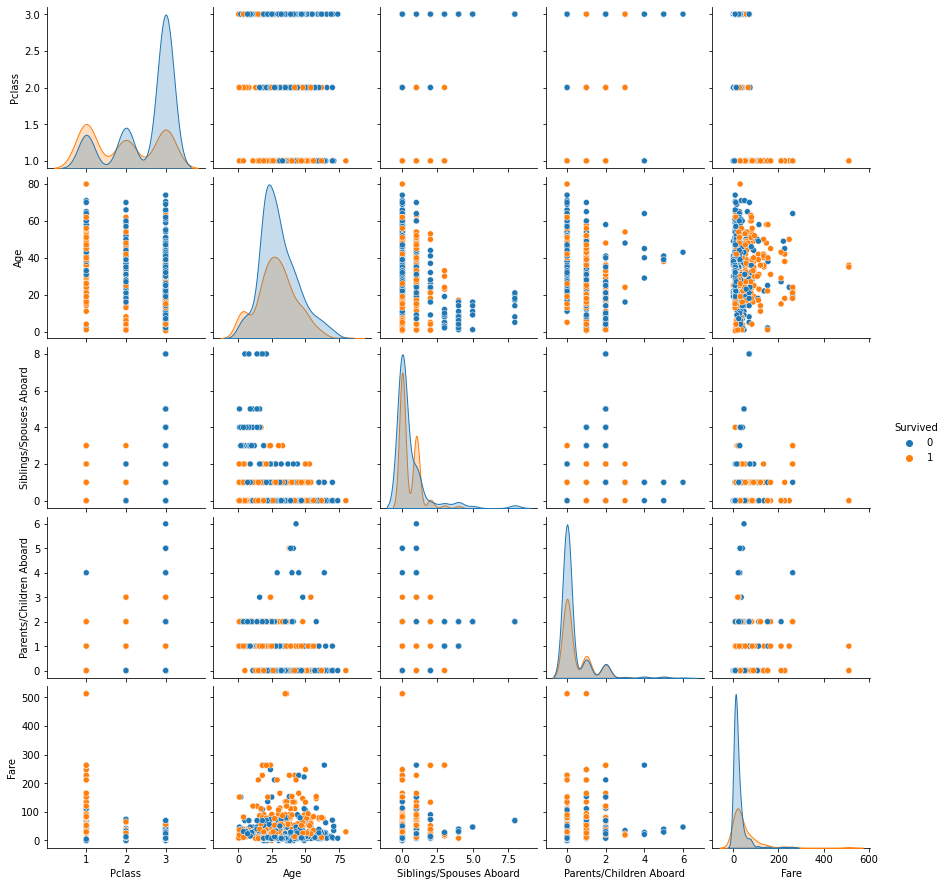

In [31]:
sns.pairplot(df[['Survived',	'Pclass',	'Age',	'Siblings/Spouses Aboard',	'Parents/Children Aboard',	'Fare']],
             hue='Survived');

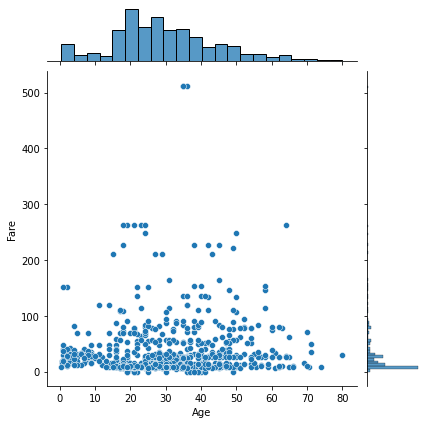

In [32]:
sns.jointplot(x='Age', y='Fare', data=df)

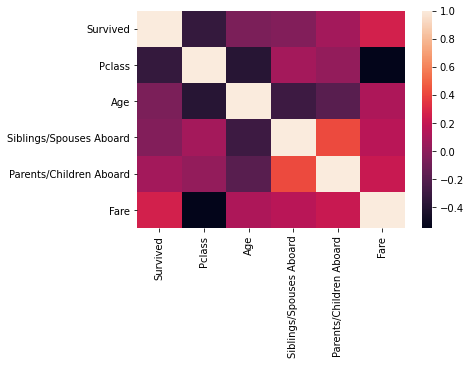

In [33]:
corr = df.corr()
sns.heatmap(corr);

In [35]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
882    13.0000
883    30.0000
884    23.4500
885    30.0000
886     7.7500
Name: Fare, Length: 887, dtype: float64

In [36]:
df[df.Age > 70]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
115,0,3,Mr. Patrick Connors,male,70.5,0,0,7.7500
490,0,1,Mr. Ramon Artagaveytia,male,71.0,0,0,49.5042
627,1,1,Mr. Algernon Henry Wilson Barkworth,male,80.0,0,0,30.0000
847,0,3,Mr. Johan Svensson,male,74.0,0,0,7.7750


In [38]:
df[(df['Age'] > 11) & (df['Siblings/Spouses Aboard'] > 4)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
70,0,3,Miss. Lillian Amy Goodwin,female,16.0,5,2,46.90
200,0,3,Mr. Frederick Sage,male,17.0,8,2,69.55
322,0,3,Mr. George John Jr Sage,male,20.0,8,2,69.55
680,0,3,Mr. Charles Edward Goodwin,male,14.0,5,2,46.90
788,0,3,Miss. Stella Anna Sage,female,21.0,8,2,69.55
842,0,3,Mr. Douglas Bullen Sage,male,18.0,8,2,69.55
859,0,3,Miss. Dorothy Edith Sage,female,14.0,8,2,69.55


In [41]:
df[(df['Age'] > 11) | (df['Siblings/Spouses Aboard'] > 4)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [45]:
df.sort_values('Age', ascending = False).head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
627,1,1,Mr. Algernon Henry Wilson Barkworth,male,80.0,0,0,30.0000
847,0,3,Mr. Johan Svensson,male,74.0,0,0,7.7750
490,0,1,Mr. Ramon Artagaveytia,male,71.0,0,0,49.5042
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
115,0,3,Mr. Patrick Connors,male,70.5,0,0,7.7500
669,0,2,Mr. Henry Michael Mitchell,male,70.0,0,0,10.5000
741,0,1,Capt. Edward Gifford Crosby,male,70.0,1,1,71.0000
535,0,3,Mr. Samuel Beard Risien,male,69.0,0,0,14.5000
33,0,2,Mr. Edward H Wheadon,male,66.0,0,0,10.5000
508,0,3,Mr. James Webber,male,66.0,0,0,8.0500


In [48]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [49]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.138532
1    28.408392
Name: Age, dtype: float64

In [ ]:
df1 = df[['PassengerId', 'Survived']]
df2 = df[['PassengerId', 'Age']]

pd.merge(df1, df2, on='PassengerId').head()

In [52]:
df.pivot_table(index='Pclass', columns='Survived', aggfunc='count')

Age      Fare      Name      Parents/Children Aboard       Sex       \
Survived    0    1    0    1    0    1                       0    1    0    1   
Pclass                                                                          
1          80  136   80  136   80  136                      80  136   80  136   
2          97   87   97   87   97   87                      97   87   97   87   
3         368  119  368  119  368  119                     368  119  368  119   

         Siblings/Spouses Aboard       
Survived                       0    1  
Pclass                                 
1                             80  136  
2                             97   87  
3                            368  119

In [53]:
df['Pclass'].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

### Exercise 1:

Try doing a few of these:

- select passengers that survived
- select passengers that embarked in port S
- select male passengers
- select passengers who paid less than 40.000 and were in third class
- locate the name of passegner Id 674
- calculate the average age of passengers using the function mean()
- count the number of survived and the number of dead passengers
- count the number of males and females
- count the number of survived and dead per each gender
- calculate average price paid by survived and dead people in each class

In [67]:
df[df['Survived'] == 1]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
...,...,...,...,...,...,...,...,...
871,1,3,Miss. Adele Kiamie Najib,female,15.0,0,0,7.2250
875,1,1,Mrs. Thomas Jr (Lily Alexenia Wilson) Potter,female,56.0,0,1,83.1583
876,1,2,Mrs. William (Imanita Parrish Hall) Shelley,female,25.0,0,1,26.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000


### Time series data

In [ ]:
df = pd.read_csv(url + "time_series_covid19_confirmed_global.csv")

In [ ]:
df.head()

### Dropping columns

In [ ]:
df1 = df.drop(['Lat', 'Long'], axis=1)
df1

### Groupby + Aggregation

In [ ]:
dfcountries = df1.groupby('Country/Region').sum().transpose()
dfcountries

### Data Time index

In [ ]:
dfcountries.index

In [ ]:
dfcountries.index = pd.to_datetime(dfcountries.index)

In [ ]:
dfcountries.index

In [ ]:
dfcountries.head()

In [ ]:
series = dfcountries['Italy']
series[series > 100].plot(style='o-', logy=True, title='Italy')
plt.ylabel('Confirmed Cases');

In [ ]:
country = 'Italy'
ts = dfcountries[country].diff()
ts = ts[ts>0]


fig, ax = plt.subplots(figsize=(10,6))
ax.bar(ts.index, ts.values)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_title(f'{country}: New cases')
ax.set_ylabel('Count')
ax.set_xlabel('Date');

### Exercise 2:

- find the top 20 countries by number of cases. You will need to use selections and these methods:
    - `.tail()`
    - `.transpose`
    - `.sort_values`

    Your goal is to obtain a Pandas Series that looks like this:
  ```
  Country/Region
  US                188172
  Italy             105792
  Spain              95923
  China              82279
  Germany            71808
  France             52827
  ...
   ```
- use a horizontal bar plot to plot them
- bonus points if you add title and labels